## Dengue Fever - Term Project

Challenge question: Using environmental data collected by various U.S. Federal Government agencies, can you predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru?

<a href="https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/80/">Link to the original competition details and dataset</a>

### Background 

Dengue ("DEN-gay") is a disease spread to humans by mosquito bites. It can cause severe flu-like symptoms and in severe cases can be fatal. There is no vaccine or medication that protects against dengue fever. Symptoms typically begin 3 to 14 days after infection.

The risk is higher during the daytime, particularly around sunrise and sunset. Mosquitoes that can transmit dengue bite even in shady areas, when it is overcast, or if you are indoors.

Dengue fever is found throughout the world, but mainly occurs in tropical and subtropical areas and in urban/semi-urban areas. It is widespread in regions of Africa, Central and South America, the Caribbean, the Eastern Mediterranean, South and Southeast Asia, and Oceania. Asia represents 70% of the global burden of disease. 

Local variations in risk influenced by rainfall, temperature, relative humidity and unplanned rapid urbanization.

The number of dengue cases reported to WHO increased over 15 fold over the last two decades, though the increase can be partly explained by a change in national practices to record and report dengue to the Ministries of Health, and to the WHO. This increase is also believed to be due to a combination of urbanization, population growth, increased international travel, and global warming.

The time it takes from ingesting the virus to actual transmission to a new host is termed the extrinsic incubation period (EIP). The EIP takes about 8-12 days when the ambient temperature is between 25-28°C. Variations in the extrinsic incubation period are not only influenced by ambient temperature; a number of factors such as the magnitude of daily temperature fluctuations, virus genotype, and initial viral concentration can also alter the time it takes for a mosquito to transmit virus. Once infectious, the mosquito is capable of transmitting virus for the rest of its life.

The Aedes aegypti mosquito is a day-time feeder; its peak biting periods are early in the morning and in the evening before sunset and feed multiple times between each egg-laying period. These mosquitos usually live between the latitudes of 35° North and 35° South below an elevation of 1,000 metres (3,300 ft). <b>Dengue mosquitoes reproduce more quickly and bite more frequently at higher temperatures</b>

The main method to control transmission is to combat mosquito vectors through:
<ul>
    <li>Prevention of mosquito breeding</li>
    <li>Personal protection from mosquito bites</li>
    <li>Community engagement</li>
    <li>Reactive vector control</li>
    <li>Active mosquito and virus surveillance</li>
</ul>

From <a href="https://travel.gc.ca/travelling/health-safety/diseases/dengue">travel.gc.ca</a>, <a href="https://www.who.int/en/news-room/fact-sheets/detail/dengue-and-severe-dengue">WHO</a>, <a href="https://en.wikipedia.org/wiki/Dengue_fever">Wikipedia</a>, and <a href="https://www.who.int/heli/risks/vectors/denguecontrol/en/">WHO HELI</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to make static images of plot embedded in the notebook
%matplotlib inline 

In [2]:
df = pd.read_csv('dengue_cleaned.csv', parse_dates=True, header=0)

In [3]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Features of interest under temperature are...<br><br>
<span style="font-size:18px">NOAA's GHCN daily climate data weather station measurements</span><br>The National Oceanic and Atmospheric Administration (NOAA) Global Historical Climatology Network (GHCN) is a database of daily climate summaries from across the globe with data from 20+ sources. Daily variables include max/min temperature, total precipitation, snowfall and depth for more than 175 years in 180 countries.  <a href="https://www.ncdc.noaa.gov/ghcn-daily-description">More info here</a>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&#8226; <code>station_max_temp_c</code> – Maximum temperature
<br>&nbsp;&nbsp;&nbsp;&nbsp;&#8226; <code>station_min_temp_c</code> – Minimum temperature
<br>&nbsp;&nbsp;&nbsp;&nbsp;&#8226; <code>station_avg_temp_c</code> – Average temperature
<br>&nbsp;&nbsp;&nbsp;&nbsp;&#8226; <code>station_diur_temp_rng_c</code> – Diurnal temperature range, the temperature during daytime<br>
<br><span style="font-size:18px">NOAA's NCEP Climate Forecast System Reanalysis Measurements</span><br>National Centers for Environmental Protection (NCEP) Climate Forecast System Reanalysis (CFSR) was designed to provide the best estimate on the state of atmosphere-ocean-land surface-sea-ice systems over 31 years from 1979 to 2009. <a href="https://climatedataguide.ucar.edu/climate-data/climate-forecast-system-reanalysis-cfsr">More info here.</a>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&#8226; <code>reanalysis_air_temp_k</code> – Mean air temperature
<br>&nbsp;&nbsp;&nbsp;&nbsp;&#8226; <code>reanalysis_max_air_temp_k</code> – Maximum air temperature
<br>&nbsp;&nbsp;&nbsp;&nbsp;&#8226; <code>reanalysis_min_air_temp_k</code> – Minimum air temperature
<br>&nbsp;&nbsp;&nbsp;&nbsp;&#8226; <code>reanalysis_avg_temp_k</code> – Average air temperature
<br>&nbsp;&nbsp;&nbsp;&nbsp;&#8226; <code>reanalysis_tdtr_k</code> – Diurnal temperature range

In [4]:
# Focusing on tempreature so dropping everything but temps
df.drop(['year',
         'weekofyear',
         'ndvi_ne', 
         'ndvi_nw', 
         'ndvi_se', 
         'ndvi_sw', 
         'precipitation_amt_mm',
         'reanalysis_precip_amt_kg_per_m2', 
         'reanalysis_dew_point_temp_k', 
         'reanalysis_relative_humidity_percent', 
         'reanalysis_sat_precip_amt_mm', 
         'reanalysis_specific_humidity_g_per_kg', 
         'station_precip_mm'], axis=1, inplace=True)

In [5]:
df.head()

,city,week_start_date,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,total_cases
0,sj,1990-04-30,297.572857,297.742857,299.8,295.9,2.628571,25.442857,6.900000,29.4,20.0,4
1,sj,1990-05-07,298.211429,298.442857,300.9,296.4,2.371429,26.714286,6.371429,31.7,22.2,5
2,sj,1990-05-14,298.781429,298.878571,300.5,297.3,2.300000,26.714286,6.485714,32.2,22.8,4
3,sj,1990-05-21,298.987143,299.228571,301.4,297.0,2.428571,27.471429,6.771429,33.3,23.3,3
4,sj,1990-05-28,299.518571,299.664286,301.9,297.5,3.014286,28.942857,9.371429,35.0,23.9,6


In [6]:
df['total_cases'].describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

In [7]:
# Are there any null values in my dataset? 
df.isnull().sum()

city                         0
week_start_date              0
reanalysis_air_temp_k        0
reanalysis_avg_temp_k        0
reanalysis_max_air_temp_k    0
reanalysis_min_air_temp_k    0
reanalysis_tdtr_k            0
station_avg_temp_c           0
station_diur_temp_rng_c      3
station_max_temp_c           0
station_min_temp_c           0
total_cases                  0
dtype: int64

In [8]:
# Describe tells me that the lowest value is 4.528571
df['station_diur_temp_rng_c'].describe()

count    1453.000000
mean        8.085892
std         2.124853
min         4.528571
25%         6.528571
50%         7.342857
75%         9.600000
max        15.800000
Name: station_diur_temp_rng_c, dtype: float64

In [9]:
# Identify the three nan values by filtering them out through >= 0
nan_remove = []

for i in range(len(df)):
    if df.iloc[i,8].sum() >= 0:
        None
    else:
        print('\nDROP ROW',i)
        print(df.iloc[i,8:9])
        nan_remove.append(i)
        
print('\nRemove these indexes', nan_remove)


DROP ROW 1152
station_diur_temp_rng_c    NaN
Name: 1152, dtype: object

DROP ROW 1353
station_diur_temp_rng_c    NaN
Name: 1353, dtype: object

DROP ROW 1354
station_diur_temp_rng_c    NaN
Name: 1354, dtype: object

Remove these indexes [1152, 1353, 1354]


In [10]:
df.drop(nan_remove, axis=0, inplace=True)

In [11]:
# WHOO got rid of 'em pesky null values
df.isnull().sum()

city                         0
week_start_date              0
reanalysis_air_temp_k        0
reanalysis_avg_temp_k        0
reanalysis_max_air_temp_k    0
reanalysis_min_air_temp_k    0
reanalysis_tdtr_k            0
station_avg_temp_c           0
station_diur_temp_rng_c      0
station_max_temp_c           0
station_min_temp_c           0
total_cases                  0
dtype: int64

In [12]:
# turn week_start_date into the index for easier plotting
df.set_index('week_start_date', inplace=True)

In [13]:
# Is my data stationary? 
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['total_cases'].values)
print('ADF of the Total Cases Column\n\nADF Statistic\t= %f\np-value\t\t= %f' % (result[0], result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('\nADF Statistic < Critical Values ∴ Total Cases is stationary.')

ADF of the Total Cases Column

ADF Statistic	= -6.627540
p-value		= 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568

ADF Statistic < Critical Values ∴ Total Cases is stationary.


In [14]:
result = adfuller(df['station_avg_temp_c'].values)
print('ADF of the Average Temperature Column\n\nADF Statistic\t= %f\np-value\t\t= %f' % (result[0], result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('\nADF Statistic < Critical Values ∴ Average Temperature is stationary.')

ADF of the Average Temperature Column

ADF Statistic	= -12.023669
p-value		= 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568

ADF Statistic < Critical Values ∴ Average Temperature is stationary.


In [15]:
result = adfuller(df['station_max_temp_c'].values)
print('ADF of the Average Temperature Column\n\nADF Statistic\t= %f\np-value\t\t= %f' % (result[0], result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('\nADF Statistic < Critical Values ∴ Maximum Temperature is stationary.')

ADF of the Average Temperature Column

ADF Statistic	= -6.188354
p-value		= 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568

ADF Statistic < Critical Values ∴ Maximum Temperature is stationary.


In [16]:
result = adfuller(df['station_min_temp_c'].values)
print('ADF of the Average Temperature Column\n\nADF Statistic\t= %f\np-value\t\t= %f' % (result[0], result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('\nADF Statistic < Critical Values ∴ Minimum Temperature is stationary.')

ADF of the Average Temperature Column

ADF Statistic	= -9.584333
p-value		= 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568

ADF Statistic < Critical Values ∴ Minimum Temperature is stationary.


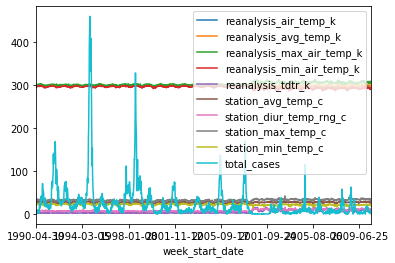

In [17]:
# Messy plot with too much going on, let's take a closer look
df.plot()

In [18]:
# Splitting the data between cities
df_sj = df[df.city=='sj']
df_iq = df[df.city=='iq']

In [19]:
# Focusing on San Juan for now
df_sj.head()

,city,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,total_cases
week_start_date,,,,,,,,,,,
1990-04-30,sj,297.572857,297.742857,299.8,295.9,2.628571,25.442857,6.900000,29.4,20.0,4
1990-05-07,sj,298.211429,298.442857,300.9,296.4,2.371429,26.714286,6.371429,31.7,22.2,5
1990-05-14,sj,298.781429,298.878571,300.5,297.3,2.300000,26.714286,6.485714,32.2,22.8,4
1990-05-21,sj,298.987143,299.228571,301.4,297.0,2.428571,27.471429,6.771429,33.3,23.3,3
1990-05-28,sj,299.518571,299.664286,301.9,297.5,3.014286,28.942857,9.371429,35.0,23.9,6


In [20]:
df_iq.head()

,city,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,total_cases
week_start_date,,,,,,,,,,,
2000-07-01,iq,296.740000,298.450000,307.3,293.1,8.928571,26.400000,10.775000,32.5,20.7,0
2000-07-08,iq,296.634286,298.428571,306.6,291.1,10.314286,26.900000,11.566667,34.0,20.8,0
2000-07-15,iq,296.415714,297.392857,304.5,292.6,7.385714,26.800000,11.466667,33.0,20.7,0
2000-07-22,iq,295.357143,296.228571,303.6,288.6,9.114286,25.766667,10.533333,31.5,14.7,0
2000-07-29,iq,296.432857,297.635714,307.0,291.5,9.500000,26.600000,11.480000,33.3,19.1,0


In [21]:
# My temperature variables
my_yvariable = ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c']

In [22]:
np.corrcoef(df_sj['total_cases'],df_sj['reanalysis_air_temp_k'])

array([[1.        , 0.17940178],
       [0.17940178, 1.        ]])

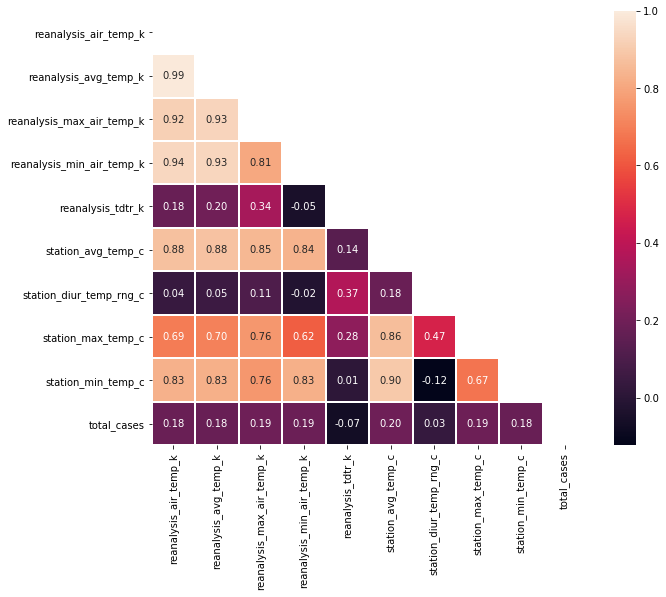

In [23]:
# total_cases aren't correlated with the temperature measures
# Average temp is correlated with max and min temp, understandably
plt.figure(figsize=(10,8))
mask = np.triu(df_sj.corr())
sns.heatmap(df_sj.corr(), 
            mask=mask, 
            annot=True, 
            linewidths=1, 
            square=True,
            fmt='.2f')

In [24]:
# The Pearson correlation coefficient indicates there is a positive correlation
# between the temperature variables and total cases
my_correlation = df_sj.corr()
my_correlation

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,total_cases
reanalysis_air_temp_k,1.000000,0.993770,0.916797,0.939407,0.177733,0.876886,0.041772,0.692535,0.830756,0.179402
reanalysis_avg_temp_k,0.993770,1.000000,0.930790,0.934973,0.197965,0.879044,0.053964,0.702634,0.826906,0.175053
reanalysis_max_air_temp_k,0.916797,0.930790,1.000000,0.805277,0.341385,0.846772,0.108193,0.759054,0.760741,0.194548
reanalysis_min_air_temp_k,0.939407,0.934973,0.805277,1.000000,-0.048433,0.836618,-0.020629,0.619540,0.827782,0.185501
reanalysis_tdtr_k,0.177733,0.197965,0.341385,-0.048433,1.000000,0.135195,0.372353,0.277447,0.008620,-0.067920
station_avg_temp_c,0.876886,0.879044,0.846772,0.836618,0.135195,1.000000,0.182524,0.864200,0.897762,0.196563
station_diur_temp_rng_c,0.041772,0.053964,0.108193,-0.020629,0.372353,0.182524,1.000000,0.470625,-0.123483,0.034801
station_max_temp_c,0.692535,0.702634,0.759054,0.619540,0.277447,0.864200,0.470625,1.000000,0.671200,0.190127
station_min_temp_c,0.830756,0.826906,0.760741,0.827782,0.008620,0.897762,-0.123483,0.671200,1.000000,0.176410
total_cases,0.179402,0.175053,0.194548,0.185501,-0.067920,0.196563,0.034801,0.190127,0.176410,1.000000


'"\nHigh correlation between the temperatures which makes sense because a hot day\nwill have a high air temperature AND hot ground temperature, which will affect\nthe average temperature measured that day and vice versa. \n\nThe variable of interest, total_cases, is relatively unaffected by any of the\ntemperature variables. There are some outliers and we can see a slight\ncorrelation a higher temperature leads to more high outliers in total cases.\n'

<Figure size 1440x1440 with 0 Axes>

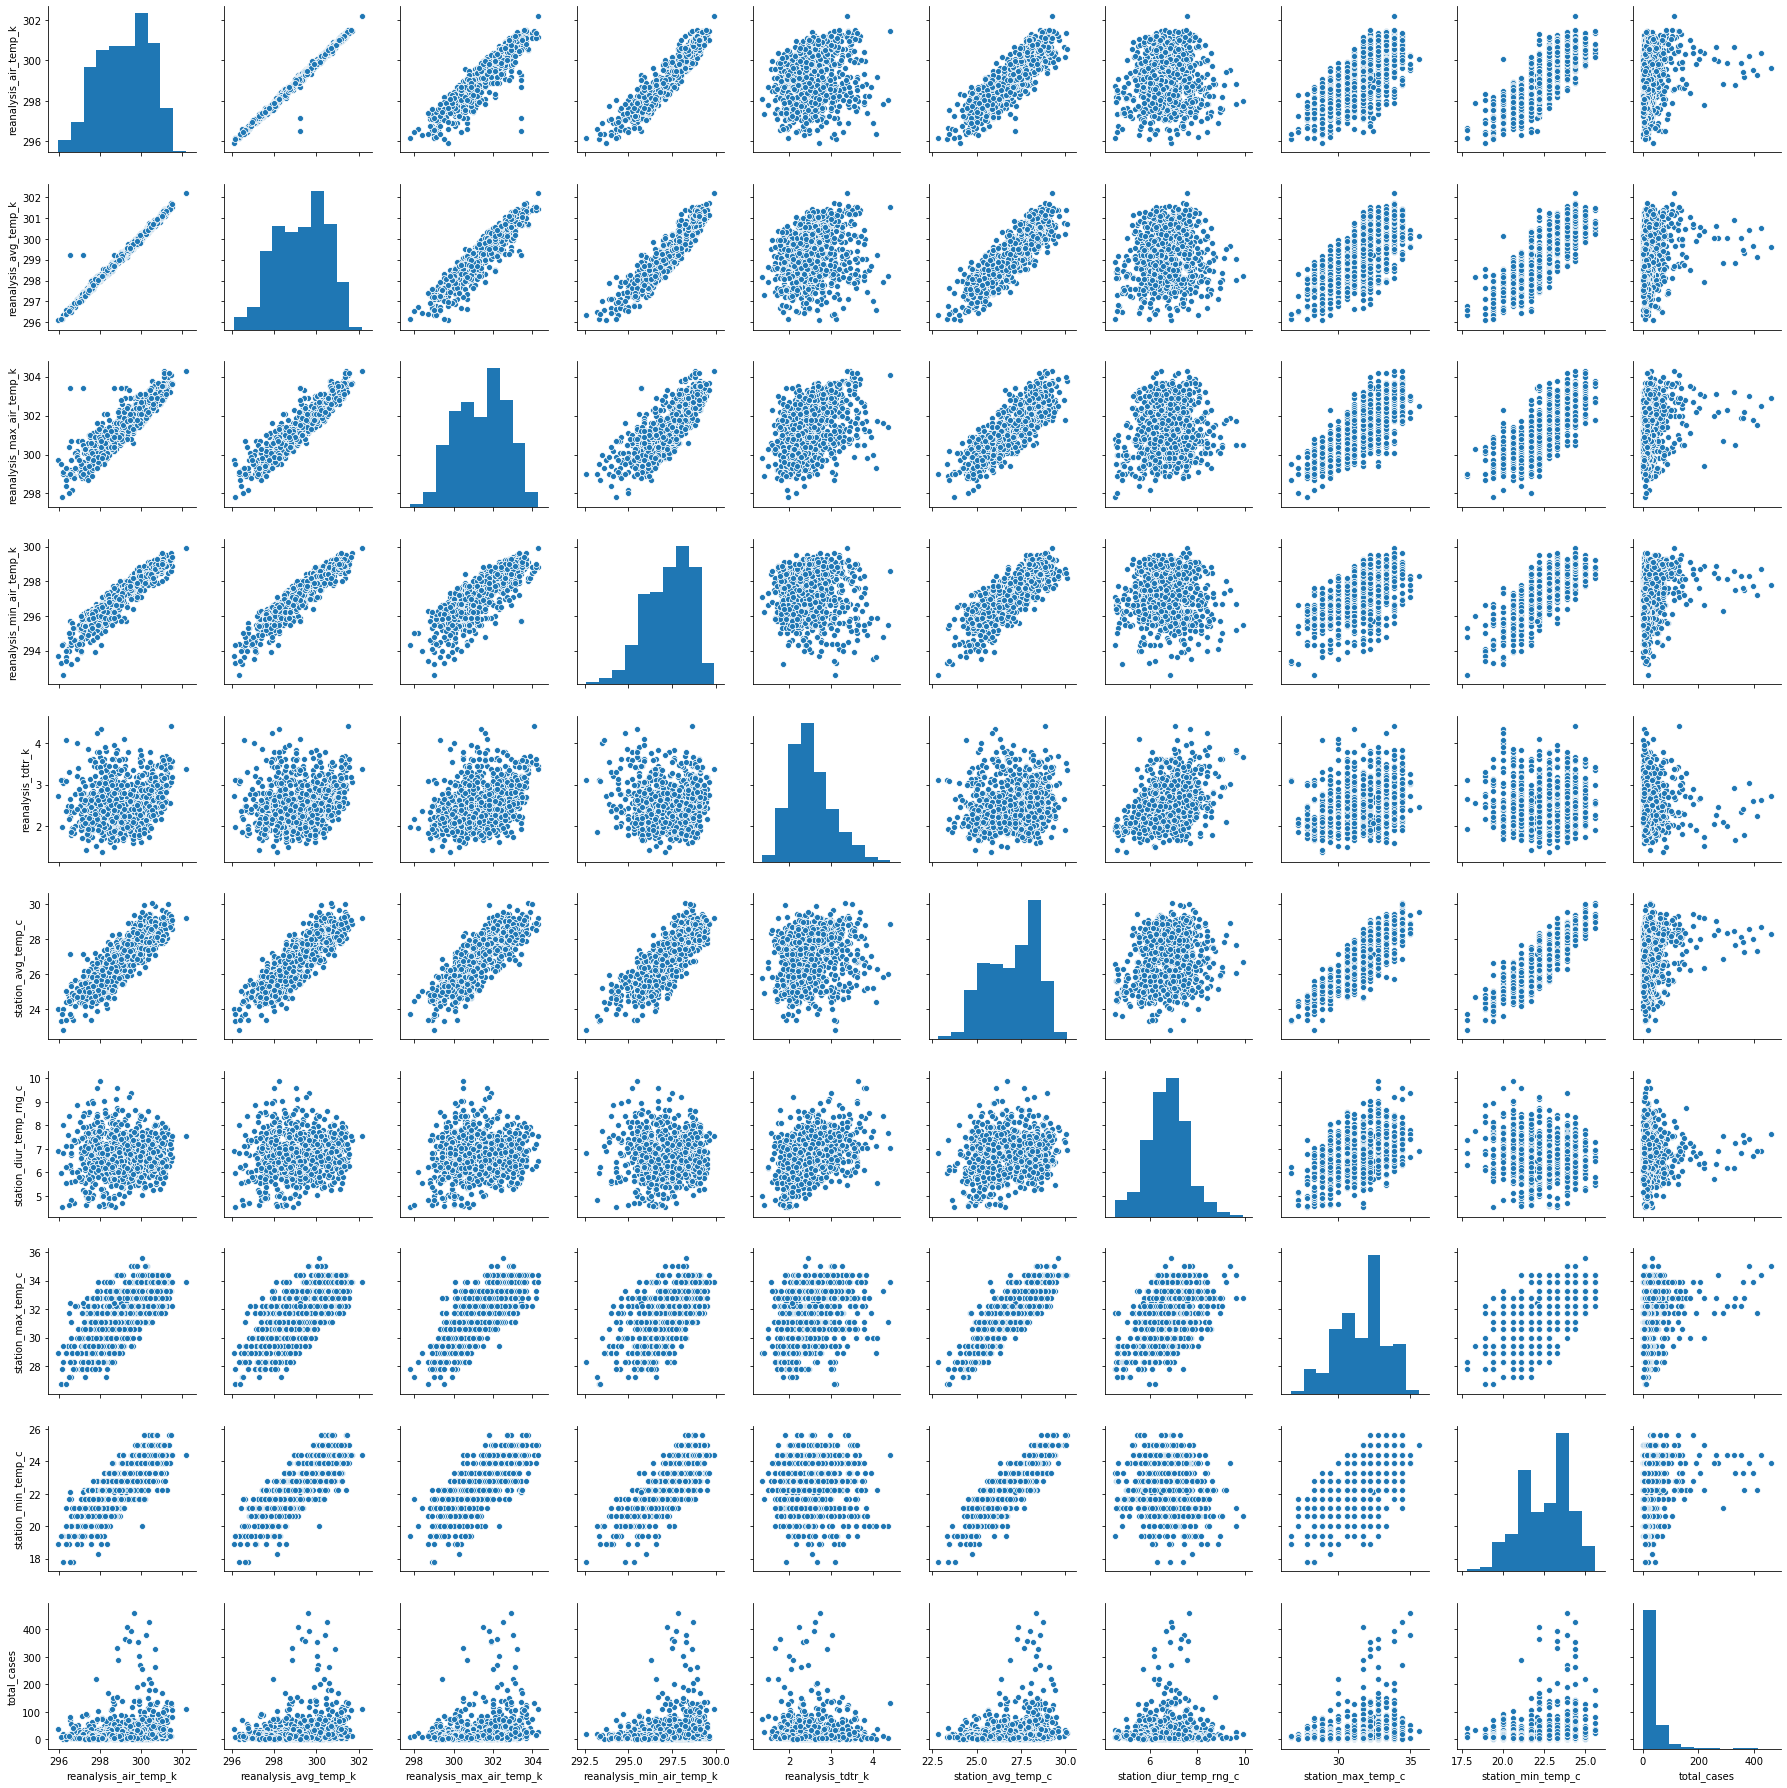

In [25]:
# Pairplot against all the temperature variables
plt.figure(figsize=(20,20))
sns.pairplot(df_sj)

""""
High correlation between the temperatures which makes sense because a hot day
will have a high air temperature AND hot ground temperature, which will affect
the average temperature measured that day and vice versa. 

The variable of interest, total_cases, is relatively unaffected by any of the
temperature variables. There are some outliers and we can see a slight
correlation a higher temperature leads to more high outliers in total cases.
"""

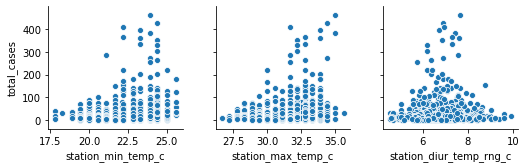

In [26]:
sns.pairplot(data=df_sj,
            y_vars=['total_cases'],
            x_vars=['station_min_temp_c','station_max_temp_c','station_diur_temp_rng_c'])

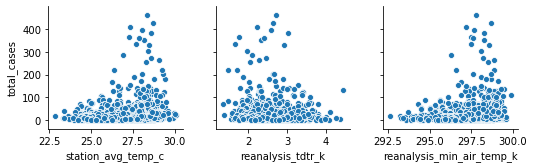

In [27]:
sns.pairplot(data=df_sj,
            y_vars=['total_cases'],
            x_vars=['station_avg_temp_c','reanalysis_tdtr_k','reanalysis_min_air_temp_k'])

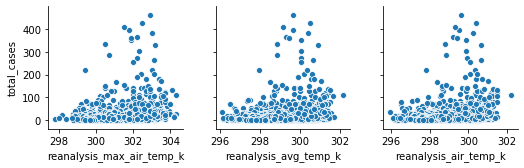

In [28]:
sns.pairplot(data=df_sj,
            y_vars=['total_cases'],
            x_vars=['reanalysis_max_air_temp_k','reanalysis_avg_temp_k','reanalysis_air_temp_k'])

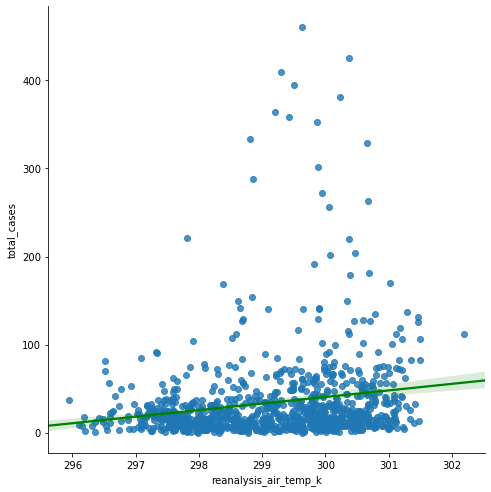

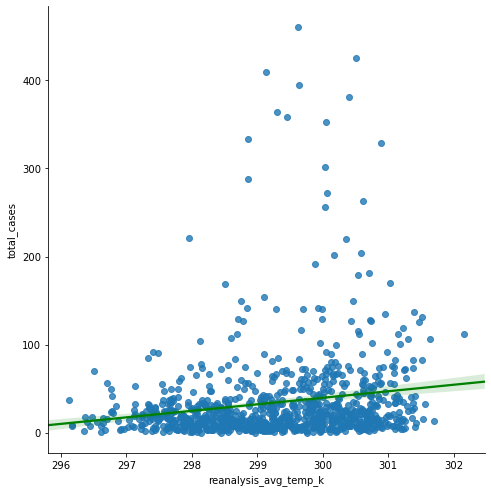

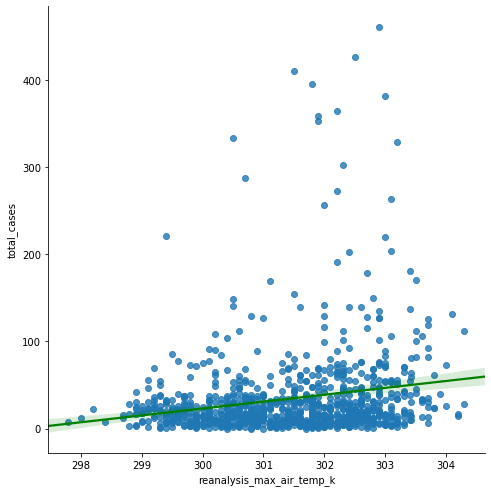

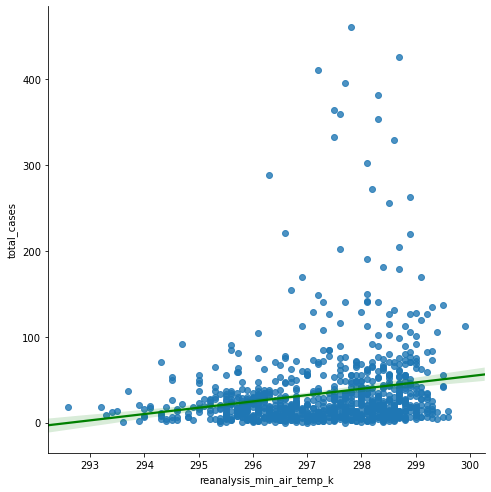

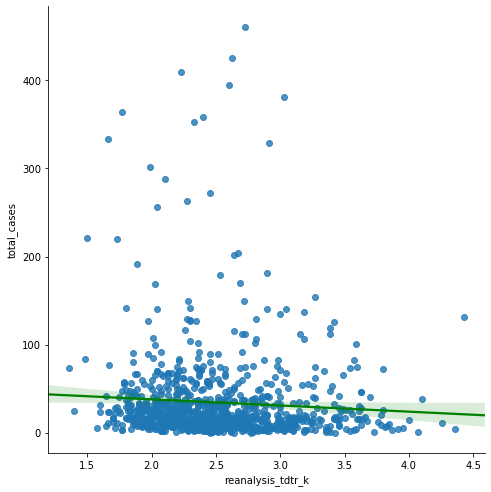

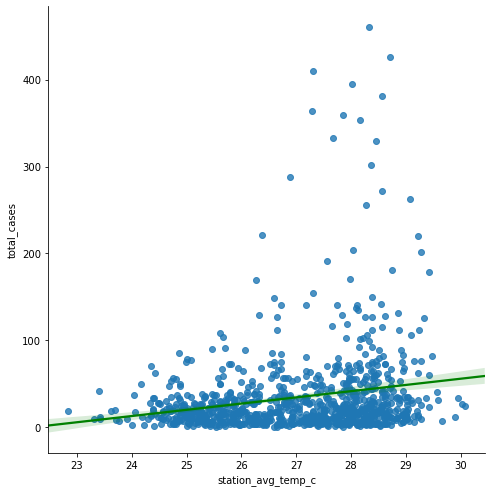

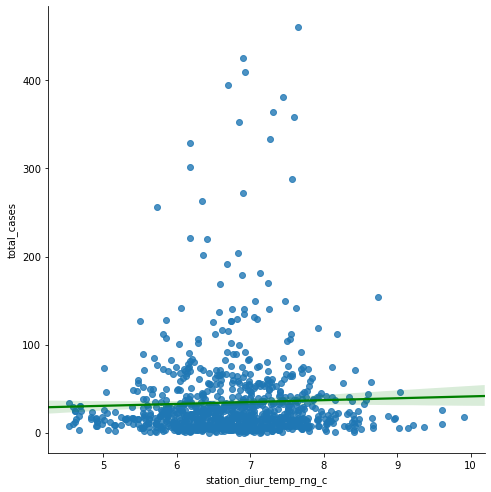

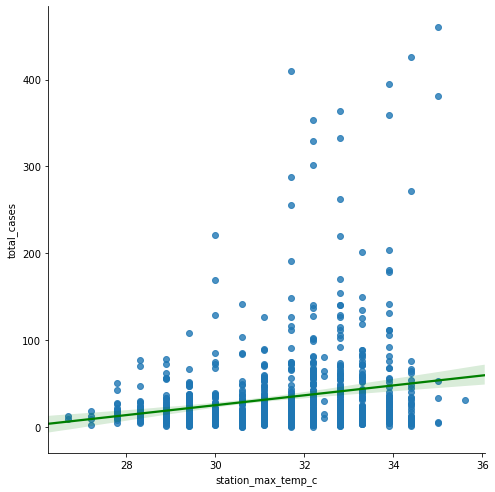

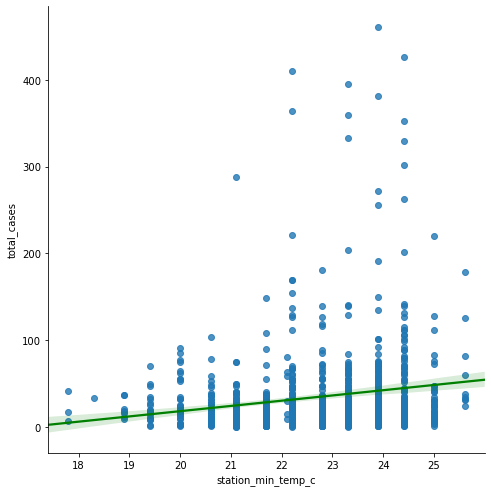

In [29]:
"""
Green shaded area is the confidence interval. Most of the plots show an 
increase in total_cases as temperature increases. Except for 
reanalysis_tdkr_k and station_diur_temp_rng_c which makes sense because
it's a temperature range and a larger number indicates a larger change in 
temperature throughout the day, not a hotter day.
"""

def my_reg_plot(my_yvariable):
    sns.pairplot(x_vars=my_yvariable, 
             y_vars='total_cases', 
             data=df_sj,
             height=7, 
             kind='reg',
             plot_kws={'line_kws':{'color':'green'}})

for i in range(len(my_yvariable)):
    my_reg_plot(my_yvariable[i])

In [30]:
# Run a regression on temperatures and total_cases
import statsmodels.api as sm

In [31]:
"""
y = mx + B where
y is the dependent variable, in this case it's total_cases
x is the independent, in this case the temperature variables
m is the slope or regression coefficient
B is the intercept, what total cases would be if temperature was 0
"""
X = df_sj[my_yvariable]
y = df_sj['total_cases']
X = sm.add_constant(X) # add an intercept so not forcing model through origin
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

C:\Users\Fani\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     8.054
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           1.49e-11
Time:                        10:11:34   Log-Likelihood:                -4979.5
No. Observations:                 936   AIC:                             9979.
Df Residuals:                     926   BIC:                         1.003e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2278.0020    879.951     -2.589      0.010   -4004.931    -551.073
reanalysis_air_temp_k        19.4486     12.338      1.576      0.115      -4.765      43.662
reanalysis_avg_temp_k       -33.1973     14.219     -2.335      0.020     -61.103      -5.292
reanalysis_max_air_temp_k    18.3092      4.668      3.922      0.000       9.147      27.471
reanalysis_min_air_temp_k     2.9813      5.183      0.575      0.565      -7.190      13.152
reanalysis_tdtr_k           -18.6030      4.925     -3.777      0.000     -28.269      -8.937
station_avg_temp_c           -1.3325      5.171     -0.258      0.797     -11.480       8.815
station_diur_temp_rng_c       3.6978      3.298      1.121      0.262      -2.774      10.169
station_max_temp_c            1.7938      2.741      0.655      0.513      -3.585       7.172
station_min_temp_c            1.1195      3.372      0.332      0.740      -5.499       7.738
==============================================================================
Omnibus:                      862.313   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25859.602
Skew:                           4.293   Prob(JB):                         0.00
Kurtosis:                      27.277   Cond. No.                     3.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations from the Regression Model
The null hypothesis: There is no relationship between temperature and total cases of Dengue fever. In other words, temperature does not influence the occurence of Dengue fever. <br><br>
<b>R-squared</b> is 0.116 which means that this model explains only 11.6% of the variance in my dependent variable, total_cases of Dengue fever.<br>
<b>F-statistic</b> measures whether two populations are statistically different and that you cannot reject the null hypothesis. <br> 
<b>AIC</b><br>
<b>coef const</b> is the value at which the regression line crosses the y-axis, also known as the y-intercept. Supposedly, if all the temperature variables were equal to 0, then total dengue cases would be -5501 which is not possible. So on its own, this constant coefficient isn't very meaningful.<br>
<b>std err</b><br>
<b>t</b><br>
<b>P|t|</b><br>
<b>[0.025, 0.975]</b><br>
<b>Omnibus</b><br>
<b>Durbin-Watson</b><br>
<b>Jarque-Bera (JB)</b><br>
<b>Skew</b><br>
<b>Kurtosis</b><br>
<b>Cond. No</b><br>

In [32]:
# Index of rows where total_cases is 0
df_sj.index[df_sj['total_cases']==0].tolist()

"""
Well, I was going to remove all the occurences where total_cases is 0
but then it turns out there's only 4 rows where this happens in San Juan. 
So, I'll just leave them in. I thought it could clear up the beginning where
we have a ton of total cases < 100 across all temperatures.

for i in range(len(df_sj)): 
    if df_sj.iloc[i,12:13] == 0:
        df_sj.iloc[i,12:13] = Nan
"""

"\nWell, I was going to remove all the occurences where total_cases is 0\nbut then it turns out there's only 4 rows where this happens in San Juan. \nSo, I'll just leave them in. I thought it could clear up the beginning where\nwe have a ton of total cases < 100 across all temperatures.\n\nfor i in range(len(df_sj)): \n    if df_sj.iloc[i,12:13] == 0:\n        df_sj.iloc[i,12:13] = Nan\n"

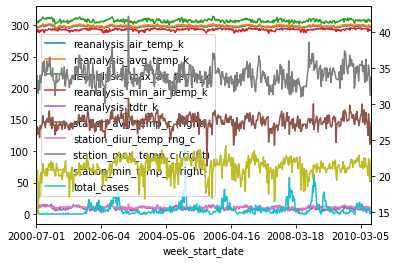

In [33]:
df_iq.plot(secondary_y=['station_avg_temp_c','station_max_temp_c','station_min_temp_c'])

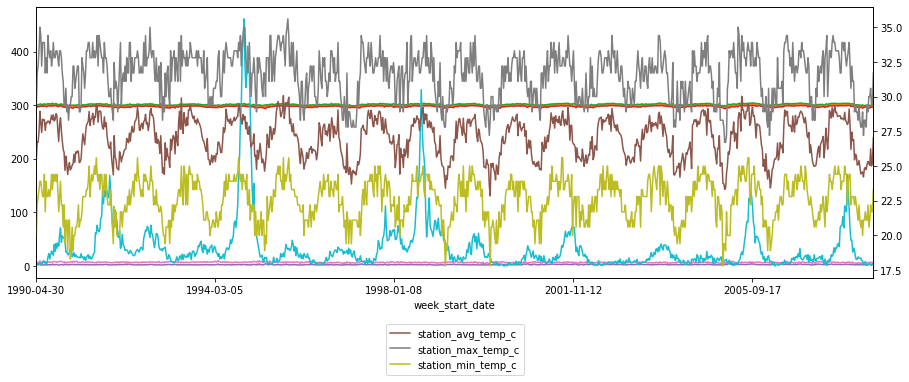

In [34]:
df_sj.plot(figsize = (15,5), 
           legend=False,
           secondary_y=['station_avg_temp_c','station_max_temp_c','station_min_temp_c'])

# Generate and place legend under the graph for better readability
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5,-0.15))

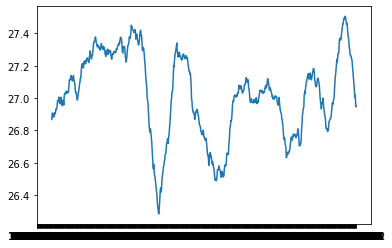

In [35]:
# See how the temperatures for each city changes over time
rolling_sj = df_sj['station_avg_temp_c'].rolling(window=52, center=False).mean()
plt.plot(rolling_sj)

In [36]:
rolling_sj[:55]

week_start_date
1990-04-30          NaN
1990-05-07          NaN
1990-05-14          NaN
1990-05-21          NaN
1990-05-28          NaN
1990-06-04          NaN
1990-06-11          NaN
1990-06-18          NaN
1990-06-25          NaN
1990-07-02          NaN
1990-07-09          NaN
1990-07-16          NaN
1990-07-23          NaN
1990-07-30          NaN
1990-08-06          NaN
1990-08-13          NaN
1990-08-20          NaN
1990-08-27          NaN
1990-09-03          NaN
1990-09-10          NaN
1990-09-17          NaN
1990-09-24          NaN
1990-10-01          NaN
1990-10-08          NaN
1990-10-15          NaN
1990-10-22          NaN
1990-10-29          NaN
1990-11-05          NaN
1990-11-12          NaN
1990-11-19          NaN
1990-11-26          NaN
1990-12-03          NaN
1990-12-10          NaN
1990-12-17          NaN
1990-12-24          NaN
1991-01-01          NaN
1991-01-08          NaN
1991-01-15          NaN
1991-01-22          NaN
1991-01-29          NaN
1991-02-05          NaN


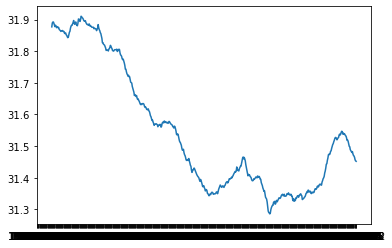

In [37]:
rolling_cases = df_sj['station_max_temp_c'].rolling(window=365, center=False).mean()
plt.plot(rolling_cases)

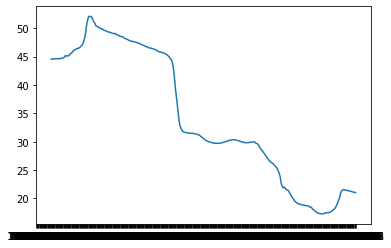

In [38]:
rolling_cases = df_sj['total_cases'].rolling(window=365, center=False).mean()
plt.plot(rolling_cases)

In [39]:
cases_by_temp = df_sj.round({'station_max_temp_c':0,'station_min_temp_c':0, 'total_cases':0})

In [40]:
cases_by_temp = pd.pivot_table(cases_by_temp, 
                               values='total_cases',
                              index=['station_max_temp_c'],
                              columns='station_min_temp_c')

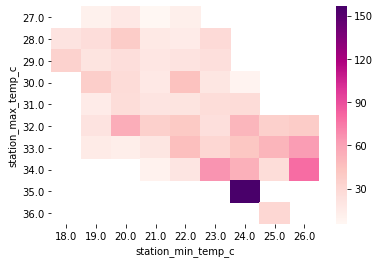

In [41]:
sns.heatmap(cases_by_temp, cmap='RdPu')

In [42]:
# Make chart with rolling mean stacked with secondary variable